# Milestone 2

In [1]:
%cd ..
# imports 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scripts_m2 import *
import torch 
from torch import nn 
from torch import optim

/home/karimgamaleldin/NLP_PROJECT_111/QA Task milestone


/home/karimgamaleldin/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
# Getting the dataloaders and tokenizers
train_dataloader, dev_dataloader, tokenizer = prepare_dataloaders_tokenizer()

Loading tokenizer from ./tokenizers/tokenizer.json...
Filtered dataset size: 19922 out of original 20000
Filtered dataset size: 1990 out of original 2000


In [3]:
vocab_size = 10000         # Size of the vocabulary
embed_dim = 300            # Dimensionality of the embeddings
hidden_size = 100          # Base hidden size; BiLSTM outputs will be 2*hidden_size
dropout = 0.2
num_layers = 3          # Number of LSTM layers
pad_idx = 1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Instantiate the BiDAF model
model = DrQAReader(vocab_size=vocab_size, embed_dim=embed_dim, hidden_size=hidden_size, dropout=dropout, pad_idx=pad_idx, num_layers=num_layers)
model = model.to(device)

# Setup an optimizer (e.g., Adam)
optimizer = optim.AdamW(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss(ignore_index=pad_idx)

train_loss, val_loss = train_qa_context_model_boilerplate(
    model=model, 
    train_dataloader=train_dataloader, 
    val_dataloader=dev_dataloader, 
    optimizer=optimizer, 
    criterion=criterion, 
    num_epochs=10, 
    device=device, 
    inputs = ["context", "question", "attention_mask_question"],
    evaluate_val_dataset=True,
)


Epoch 1/10: 100%|██████████| 623/623 [01:07<00:00,  9.30it/s, loss=5.87]


Epoch 1 Loss: 6.8258


Evaluating: 100%|██████████| 623/623 [00:37<00:00, 16.79it/s]


Training Loss: 4.6409
Training Metrics: {'start_accuracy': 0.3583977512297962, 'start_precision': 0.3688954431456202, 'start_recall': 0.3583977512297962, 'start_f1_score': 0.3603355697388289, 'end_accuracy': 0.3560385503463508, 'end_precision': 0.36624483185311424, 'end_recall': 0.3560385503463508, 'end_f1_score': 0.3578968229078386, 'joint_exact_match': 0.275474349964863, 'span_overlap_f1': 0.2979185907537065}


Evaluating: 100%|██████████| 63/63 [00:03<00:00, 17.24it/s]


Validation Loss: 6.8176
Validation Metrics: {'start_accuracy': 0.21608040201005024, 'start_precision': 0.23616890634390694, 'start_recall': 0.21608040201005024, 'start_f1_score': 0.21400371426042397, 'end_accuracy': 0.19798994974874373, 'end_precision': 0.22170399218564196, 'end_recall': 0.19798994974874373, 'end_f1_score': 0.1989026761868289, 'joint_exact_match': 0.14522613065326634, 'span_overlap_f1': 0.17623466233310553}
--------------------------------------------------


Epoch 2/10: 100%|██████████| 623/623 [01:08<00:00,  9.10it/s, loss=3.41]


Epoch 2 Loss: 4.7402


Evaluating: 100%|██████████| 623/623 [00:37<00:00, 16.69it/s]


Training Loss: 3.6788
Training Metrics: {'start_accuracy': 0.453418331492822, 'start_precision': 0.4555288685516468, 'start_recall': 0.453418331492822, 'start_f1_score': 0.4505768173811648, 'end_accuracy': 0.4488505170163638, 'end_precision': 0.4521622930107122, 'end_recall': 0.4488505170163638, 'end_f1_score': 0.4464446088871563, 'joint_exact_match': 0.38726031522939464, 'span_overlap_f1': 0.40779735344533413}


Evaluating: 100%|██████████| 63/63 [00:03<00:00, 16.57it/s]


Validation Loss: 6.5524
Validation Metrics: {'start_accuracy': 0.24874371859296482, 'start_precision': 0.27547002932164627, 'start_recall': 0.24874371859296482, 'start_f1_score': 0.24772684600579428, 'end_accuracy': 0.23417085427135678, 'end_precision': 0.2566613270523482, 'end_recall': 0.23417085427135678, 'end_f1_score': 0.23353377820214144, 'joint_exact_match': 0.18643216080402011, 'span_overlap_f1': 0.2176058821320398}
--------------------------------------------------


Epoch 3/10: 100%|██████████| 623/623 [01:08<00:00,  9.04it/s, loss=3.29]


Epoch 3 Loss: 3.9894


Evaluating: 100%|██████████| 623/623 [00:34<00:00, 18.06it/s]


Training Loss: 2.9858
Training Metrics: {'start_accuracy': 0.5391526955124988, 'start_precision': 0.5444468353742897, 'start_recall': 0.5391526955124988, 'start_f1_score': 0.5324864650042791, 'end_accuracy': 0.528109627547435, 'end_precision': 0.5314561365884747, 'end_recall': 0.528109627547435, 'end_f1_score': 0.5219003924945064, 'joint_exact_match': 0.4732958538299368, 'span_overlap_f1': 0.4940390263610219}


Evaluating: 100%|██████████| 63/63 [00:03<00:00, 20.73it/s]


Validation Loss: 6.5993
Validation Metrics: {'start_accuracy': 0.2743718592964824, 'start_precision': 0.28911617242319243, 'start_recall': 0.2743718592964824, 'start_f1_score': 0.26571482947464337, 'end_accuracy': 0.2547738693467337, 'end_precision': 0.2788622267512823, 'end_recall': 0.2547738693467337, 'end_f1_score': 0.24907092209843565, 'joint_exact_match': 0.20954773869346735, 'span_overlap_f1': 0.24256864192385047}
--------------------------------------------------


Epoch 4/10: 100%|██████████| 623/623 [01:07<00:00,  9.26it/s, loss=3.95]


Epoch 4 Loss: 3.4236


Evaluating: 100%|██████████| 623/623 [00:42<00:00, 14.74it/s]


Training Loss: 2.5059
Training Metrics: {'start_accuracy': 0.5908543318943881, 'start_precision': 0.5954687373154529, 'start_recall': 0.5908543318943881, 'start_f1_score': 0.5854039492485139, 'end_accuracy': 0.5956731251882341, 'end_precision': 0.6022012649915559, 'end_recall': 0.5956731251882341, 'end_f1_score': 0.5903073227435562, 'joint_exact_match': 0.5344342937456079, 'span_overlap_f1': 0.5556140126460564}


Evaluating: 100%|██████████| 63/63 [00:04<00:00, 14.96it/s]


Validation Loss: 6.8651
Validation Metrics: {'start_accuracy': 0.2914572864321608, 'start_precision': 0.31388084693615137, 'start_recall': 0.2914572864321608, 'start_f1_score': 0.2853959107919503, 'end_accuracy': 0.27889447236180903, 'end_precision': 0.29729941263042287, 'end_recall': 0.27889447236180903, 'end_f1_score': 0.2726557955779637, 'joint_exact_match': 0.2321608040201005, 'span_overlap_f1': 0.2617375646152558}
--------------------------------------------------


Epoch 5/10: 100%|██████████| 623/623 [01:13<00:00,  8.46it/s, loss=2.84]


Epoch 5 Loss: 3.0209


Evaluating: 100%|██████████| 623/623 [00:36<00:00, 17.14it/s]


Training Loss: 1.9954
Training Metrics: {'start_accuracy': 0.6648428872603153, 'start_precision': 0.6701240751369882, 'start_recall': 0.6648428872603153, 'start_f1_score': 0.6613461297230686, 'end_accuracy': 0.6586186125890975, 'end_precision': 0.6657702667301493, 'end_recall': 0.6586186125890975, 'end_f1_score': 0.6538048172277333, 'joint_exact_match': 0.608422849111535, 'span_overlap_f1': 0.6278803636578872}


Evaluating: 100%|██████████| 63/63 [00:03<00:00, 16.67it/s]


Validation Loss: 7.0935
Validation Metrics: {'start_accuracy': 0.2809045226130653, 'start_precision': 0.2928491694582389, 'start_recall': 0.2809045226130653, 'start_f1_score': 0.2749867645408512, 'end_accuracy': 0.27638190954773867, 'end_precision': 0.2973677444487567, 'end_recall': 0.27638190954773867, 'end_f1_score': 0.27219903375798493, 'joint_exact_match': 0.23015075376884422, 'span_overlap_f1': 0.2615133954797457}
--------------------------------------------------


Epoch 6/10: 100%|██████████| 623/623 [01:07<00:00,  9.19it/s, loss=3.66]


Epoch 6 Loss: 2.6091


Evaluating: 100%|██████████| 623/623 [00:36<00:00, 17.03it/s]


Training Loss: 1.6901
Training Metrics: {'start_accuracy': 0.7149382592109226, 'start_precision': 0.7206134298050783, 'start_recall': 0.7149382592109226, 'start_f1_score': 0.7122011626025023, 'end_accuracy': 0.7082120269049292, 'end_precision': 0.7133358249157447, 'end_recall': 0.7082120269049292, 'end_f1_score': 0.7050272701442158, 'joint_exact_match': 0.6626342736673024, 'span_overlap_f1': 0.6823541826100772}


Evaluating: 100%|██████████| 63/63 [00:04<00:00, 15.06it/s]


Validation Loss: 7.5984
Validation Metrics: {'start_accuracy': 0.2894472361809045, 'start_precision': 0.30892005318750426, 'start_recall': 0.2894472361809045, 'start_f1_score': 0.2855886880514639, 'end_accuracy': 0.2804020100502513, 'end_precision': 0.30374260305189255, 'end_recall': 0.2804020100502513, 'end_f1_score': 0.27650686377726563, 'joint_exact_match': 0.2321608040201005, 'span_overlap_f1': 0.26834948824354077}
--------------------------------------------------


Epoch 7/10: 100%|██████████| 623/623 [01:12<00:00,  8.61it/s, loss=2.01]


Epoch 7 Loss: 2.2939


Evaluating: 100%|██████████| 623/623 [00:42<00:00, 14.82it/s]


Training Loss: 1.4931
Training Metrics: {'start_accuracy': 0.7530368436903925, 'start_precision': 0.7581690871494441, 'start_recall': 0.7530368436903925, 'start_f1_score': 0.7511322232877061, 'end_accuracy': 0.747816484288726, 'end_precision': 0.7543644614999152, 'end_recall': 0.747816484288726, 'end_f1_score': 0.7450172401645501, 'joint_exact_match': 0.7059030217849613, 'span_overlap_f1': 0.7241652355333722}


Evaluating: 100%|██████████| 63/63 [00:04<00:00, 15.35it/s]


Validation Loss: 7.8124
Validation Metrics: {'start_accuracy': 0.2894472361809045, 'start_precision': 0.29958050078281717, 'start_recall': 0.2894472361809045, 'start_f1_score': 0.2840278612000578, 'end_accuracy': 0.2819095477386935, 'end_precision': 0.3003522622249341, 'end_recall': 0.2819095477386935, 'end_f1_score': 0.2770701326329021, 'joint_exact_match': 0.2371859296482412, 'span_overlap_f1': 0.268902594875427}
--------------------------------------------------


Epoch 8/10: 100%|██████████| 623/623 [01:10<00:00,  8.89it/s, loss=1.67]


Epoch 8 Loss: 2.0559


Evaluating: 100%|██████████| 623/623 [00:38<00:00, 16.12it/s]


Training Loss: 1.2177
Training Metrics: {'start_accuracy': 0.7855135026603755, 'start_precision': 0.7900240894306049, 'start_recall': 0.7855135026603755, 'start_f1_score': 0.7845205713490565, 'end_accuracy': 0.7826523441421545, 'end_precision': 0.7871827572172262, 'end_recall': 0.7826523441421545, 'end_f1_score': 0.780582436586587, 'joint_exact_match': 0.7460596325670114, 'span_overlap_f1': 0.7626816977189129}


Evaluating: 100%|██████████| 63/63 [00:03<00:00, 16.41it/s]


Validation Loss: 8.6219
Validation Metrics: {'start_accuracy': 0.28391959798994976, 'start_precision': 0.2989443347689812, 'start_recall': 0.28391959798994976, 'start_f1_score': 0.28001065868967046, 'end_accuracy': 0.28492462311557787, 'end_precision': 0.30677959861513143, 'end_recall': 0.28492462311557787, 'end_f1_score': 0.28295638225764574, 'joint_exact_match': 0.24321608040201004, 'span_overlap_f1': 0.27157508814415}
--------------------------------------------------


Epoch 9/10: 100%|██████████| 623/623 [01:10<00:00,  8.81it/s, loss=1.97] 


Epoch 9 Loss: 1.8172


Evaluating: 100%|██████████| 623/623 [00:37<00:00, 16.53it/s]


Training Loss: 1.0226
Training Metrics: {'start_accuracy': 0.8140748920791085, 'start_precision': 0.8176678110923485, 'start_recall': 0.8140748920791085, 'start_f1_score': 0.8131972233210221, 'end_accuracy': 0.8098082521835157, 'end_precision': 0.8135544691224529, 'end_recall': 0.8098082521835157, 'end_f1_score': 0.8083534095451276, 'joint_exact_match': 0.7753237626744303, 'span_overlap_f1': 0.7913178182656193}


Evaluating: 100%|██████████| 63/63 [00:03<00:00, 16.17it/s]


Validation Loss: 9.7270
Validation Metrics: {'start_accuracy': 0.29095477386934676, 'start_precision': 0.3041664338831781, 'start_recall': 0.29095477386934676, 'start_f1_score': 0.2871132675829966, 'end_accuracy': 0.28693467336683415, 'end_precision': 0.30214590475156144, 'end_recall': 0.28693467336683415, 'end_f1_score': 0.2820551941092284, 'joint_exact_match': 0.2442211055276382, 'span_overlap_f1': 0.2759489186796409}
--------------------------------------------------


Epoch 10/10: 100%|██████████| 623/623 [01:10<00:00,  8.89it/s, loss=1.08] 


Epoch 10 Loss: 1.6464


Evaluating: 100%|██████████| 623/623 [00:39<00:00, 15.89it/s]


Training Loss: 0.9134
Training Metrics: {'start_accuracy': 0.8374159220961751, 'start_precision': 0.8420309858278996, 'start_recall': 0.8374159220961751, 'start_f1_score': 0.8366143085204243, 'end_accuracy': 0.8294849914667202, 'end_precision': 0.83503216030159, 'end_recall': 0.8294849914667202, 'end_f1_score': 0.8277332544971849, 'joint_exact_match': 0.8001706655958237, 'span_overlap_f1': 0.8164271478540908}


Evaluating: 100%|██████████| 63/63 [00:03<00:00, 16.01it/s]

Validation Loss: 10.0587
Validation Metrics: {'start_accuracy': 0.28241206030150756, 'start_precision': 0.2978009009657185, 'start_recall': 0.28241206030150756, 'start_f1_score': 0.2768936913924274, 'end_accuracy': 0.2798994974874372, 'end_precision': 0.2923221864455237, 'end_recall': 0.2798994974874372, 'end_f1_score': 0.27231106970619506, 'joint_exact_match': 0.2422110552763819, 'span_overlap_f1': 0.27276099594754605}
--------------------------------------------------


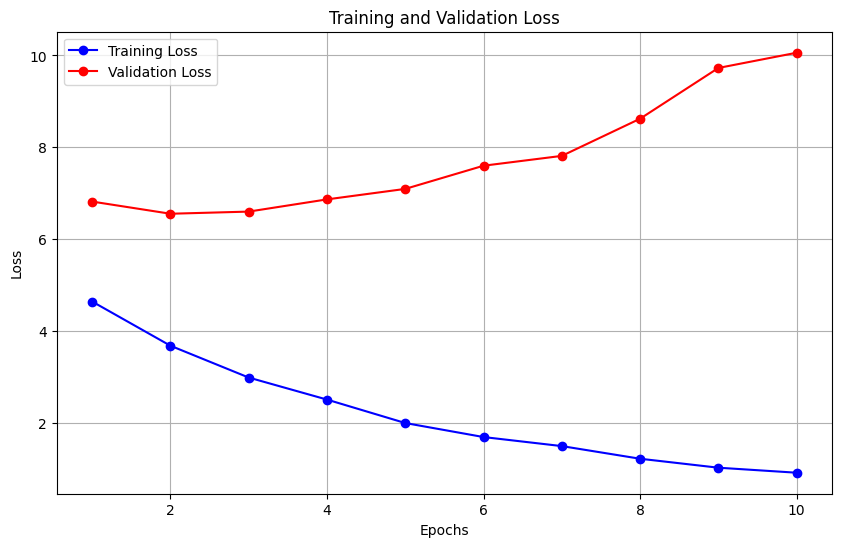

In [4]:
# Plotting the training and validation loss
plot_loss_curves(train_loss, val_loss)

In [21]:
model_path = "models/qa_context_model_dqra.pkl"

In [22]:
save_model(model, model_path)

Model file models/qa_context_model_dqra.pkl already exists. Skipping save.


In [23]:
model = load_model(model_path=model_path)

Model loaded from models/qa_context_model_dqra.pkl


In [24]:
# evaluate the model on the dev set
criterion = nn.CrossEntropyLoss(ignore_index=1)
evaluate_qa_context_model_boilerplate(model=model, dataloader=train_dataloader, criterion=criterion, device='cuda', inputs = ["context", "question", "attention_mask_question"])

Evaluating:   0%|          | 0/623 [00:00<?, ?it/s]/home/karimgamaleldin/.local/lib/python3.10/site-packages/torch/nn/modules/rnn.py:1124: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at /pytorch/aten/src/ATen/native/cudnn/RNN.cpp:1412.)
  result = _VF.lstm(
Evaluating: 100%|██████████| 623/623 [00:39<00:00, 15.84it/s]


Validation Loss: 0.9130
Validation Metrics: {'start_accuracy': 0.8374159220961751, 'start_precision': 0.8420309858278996, 'start_recall': 0.8374159220961751, 'start_f1_score': 0.8366143085204243, 'end_accuracy': 0.8294849914667202, 'end_precision': 0.83503216030159, 'end_recall': 0.8294849914667202, 'end_f1_score': 0.8277332544971849, 'joint_exact_match': 0.8001706655958237, 'span_overlap_f1': 0.8164271478540908}


(0.9130401326220835,
 {'start_accuracy': 0.8374159220961751,
  'start_precision': 0.8420309858278996,
  'start_recall': 0.8374159220961751,
  'start_f1_score': 0.8366143085204243,
  'end_accuracy': 0.8294849914667202,
  'end_precision': 0.83503216030159,
  'end_recall': 0.8294849914667202,
  'end_f1_score': 0.8277332544971849,
  'joint_exact_match': 0.8001706655958237,
  'span_overlap_f1': 0.8164271478540908})

In [25]:
# evaluate the model on the dev set
criterion = nn.CrossEntropyLoss(ignore_index=1)
evaluate_qa_context_model_boilerplate(model=model, dataloader=dev_dataloader, criterion=criterion, device='cuda', inputs = ["context", "question", "attention_mask_question"])

Evaluating:   0%|          | 0/63 [00:00<?, ?it/s]/home/karimgamaleldin/.local/lib/python3.10/site-packages/torch/nn/modules/rnn.py:1124: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at /pytorch/aten/src/ATen/native/cudnn/RNN.cpp:1412.)
  result = _VF.lstm(
Evaluating: 100%|██████████| 63/63 [00:04<00:00, 13.51it/s]

Validation Loss: 10.0587
Validation Metrics: {'start_accuracy': 0.28241206030150756, 'start_precision': 0.2978009009657185, 'start_recall': 0.28241206030150756, 'start_f1_score': 0.2768936913924274, 'end_accuracy': 0.2798994974874372, 'end_precision': 0.2923221864455237, 'end_recall': 0.2798994974874372, 'end_f1_score': 0.27231106970619506, 'joint_exact_match': 0.2422110552763819, 'span_overlap_f1': 0.27276099594754605}


(10.058694892459446,
 {'start_accuracy': 0.28241206030150756,
  'start_precision': 0.2978009009657185,
  'start_recall': 0.28241206030150756,
  'start_f1_score': 0.2768936913924274,
  'end_accuracy': 0.2798994974874372,
  'end_precision': 0.2923221864455237,
  'end_recall': 0.2798994974874372,
  'end_f1_score': 0.27231106970619506,
  'joint_exact_match': 0.2422110552763819,
  'span_overlap_f1': 0.27276099594754605})

In [26]:
preds, true_labels = predict_qa_context_model_boilerplate(model=model, dataloader=dev_dataloader, tokenizer=tokenizer, device='cuda', inputs = ["context", "question", "attention_mask_question"])

Predicting:   0%|          | 0/63 [00:00<?, ?it/s]/home/karimgamaleldin/.local/lib/python3.10/site-packages/torch/nn/modules/rnn.py:1124: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at /pytorch/aten/src/ATen/native/cudnn/RNN.cpp:1412.)
  result = _VF.lstm(
Predicting: 100%|██████████| 63/63 [00:04<00:00, 14.25it/s]


In [27]:
# Compare the predictions with the actual answers
for i in range(100):
    print(f"Predicted Answer: {preds[i]}")
    print(f"True Answer: {true_labels[i]}")
    print("-" * 50)

Predicted Answer: two
True Answer: 3
--------------------------------------------------
Predicted Answer: 8
True Answer: 8
--------------------------------------------------
Predicted Answer: 8
True Answer: 8
--------------------------------------------------
Predicted Answer: 12
True Answer: 5
--------------------------------------------------
Predicted Answer: 27 - 30 %
True Answer: 5
--------------------------------------------------
Predicted Answer: 1
True Answer: 1
--------------------------------------------------
Predicted Answer: 2 . similarly , when written in the usual decimal system , all prime numbers larger than 5 end in 1 , 3 , 7 , or 9 , since even numbers are multiples of 2 and numbers ending in 0 or 5 are multiples of 5
True Answer: 2
--------------------------------------------------
Predicted Answer: 11 . 1 %.
True Answer: 7
--------------------------------------------------
Predicted Answer: 2
True Answer: 9
--------------------------------------------------
Predic

In [28]:
train_preds, train_true_labels = predict_qa_context_model_boilerplate(model=model, dataloader=train_dataloader, tokenizer=tokenizer, device='cuda', inputs = ["context", "question", "attention_mask_question"])

Predicting: 100%|██████████| 623/623 [00:41<00:00, 14.87it/s]


In [29]:
# Compare the predictions with the actual answers
for i in range(100):
    print(f"Predicted Answer: {train_preds[i]}")
    print(f"True Answer: {train_true_labels[i]}")
    print("-" * 50)

Predicted Answer: 1953
True Answer: 1953
--------------------------------------------------
Predicted Answer: 2 , 300
True Answer: 2 , 300
--------------------------------------------------
Predicted Answer: 1992 and also only narrowly lost the state in 1996
True Answer: 1996
--------------------------------------------------
Predicted Answer: ( 1983
True Answer: 1983
--------------------------------------------------
Predicted Answer: 5 %
True Answer: 5 %
--------------------------------------------------
Predicted Answer: alcohol
True Answer: alcohol
--------------------------------------------------
Predicted Answer: ad 43
True Answer: ad 43
--------------------------------------------------
Predicted Answer: 1913
True Answer: 1913
--------------------------------------------------
Predicted Answer: prague
True Answer: prague
--------------------------------------------------
Predicted Answer: 1784
True Answer: 1784
--------------------------------------------------
Predicted Answer